In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import pickle
import re

In [2]:
log_file = "../src/run.log"

In [3]:
parttern = "\[METHOD\]: ([a-zA-Z_]*) \[RATIO\] ([1-9]\d*\.\d*|0\.\d*[1-9]\d*) \[VALID\] AUC: ([1-9]\d*\.\d*|0\.\d*[1-9]\d*)"
pa =re.compile(parttern)

with open(log_file, "r") as f:
    res = pa.findall(f.read())

In [4]:
res_dict = {}
for item in res:
    if item[0] in res_dict:
        res_dict[item[0]][item[1]] = float(item[2])
    else:
        res_dict[item[0]] = {
            item[1] : float(item[2])
        }

In [5]:
def draw_auc_to_ratio(results, methods, ratios, legends, title="Criteo(10K)"):
    for i,method in enumerate(methods):
        plt.plot([(1 - float(i)) for i in ratios], 
                 [results[method][ratio] for ratio in ratios],
                 marker ="o", markersize=4
                )
    plt.xticks([(1 - float(i)) for i in ratios])
    plt.xlabel("Pruning ratio")
    plt.ylabel("Averaged test AUC")
    plt.legend(legends)
    plt.title(title)

### Figure 3 & 8 for Criteo dataset

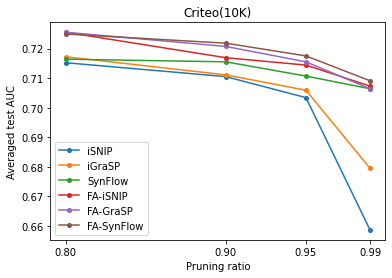

In [6]:
methods = ["isnip", "igrasp", "synflow", "fsnip", "fgrasp",  "fsynflow"]
legends = ['iSNIP', "iGraSP", "SynFlow", "FA-iSNIP", "FA-GraSP", "FA-SynFlow"]
ratios = ['0.2', '0.1', '0.05', '0.01']
draw_auc_to_ratio(res_dict, methods, ratios, legends)